## Onur Can
## FoodStyles- Technical Challenge - Data Scientist
## 22.01.2023

### 0. Dataset Import

In [1]:
# Necessary library imports for the taks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Please change "path" accordingly
path = "dataset.csv"
df = pd.read_csv(path)

C:\Users\Onur Can\AppData\Local\Temp\ipykernel_16696\2077287598.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [3]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

## Part 1: Data Cleaning
### 1.1. Identify the columns with mixed data types.
* (1) Applymap method applies python built-in type function to a Dataframe elementwise.
* (2) Elements wise comparison between first row dtype and dataframe gives us the mixed dtype columns.
* (3) Column names saved as python list for future implementation

In [6]:
mixed_cols = []
for index, col in enumerate(df.columns):
    mixed = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[mixed]) > 0:
        print("Column index {} :  -- {:20} has mixed dtypes ".format(index, col))
        mixed_cols.append(col)
print("\n Mixed Columns' Names : \n", mixed_cols)

Column index 4 :  -- region               has mixed dtypes 
Column index 5 :  -- province             has mixed dtypes 
Column index 6 :  -- city                 has mixed dtypes 
Column index 10 :  -- claimed              has mixed dtypes 
Column index 11 :  -- awards               has mixed dtypes 
Column index 12 :  -- popularity_detailed  has mixed dtypes 
Column index 13 :  -- popularity_generic   has mixed dtypes 
Column index 14 :  -- top_tags             has mixed dtypes 
Column index 15 :  -- price_level          has mixed dtypes 
Column index 16 :  -- price_range          has mixed dtypes 
Column index 17 :  -- meals                has mixed dtypes 
Column index 18 :  -- cuisines             has mixed dtypes 
Column index 19 :  -- special_diets        has mixed dtypes 
Column index 20 :  -- features             has mixed dtypes 
Column index 24 :  -- original_open_hours  has mixed dtypes 
Column index 30 :  -- default_language     has mixed dtypes 
Column index 41 :  -- keywo

### 1.2. For each column, count the number of rows per data type.
* (1) Application of Applymap method with python built-in type function gives the dtype of each of row
* (2) Value_counts method is applied to derived "mixed_cols" list in conjunction with (1)
* (3) Results are saved as "df_dtype_count" dataFrame object

In [7]:
df_dtype_count = pd.DataFrame(columns= mixed_cols)
for mixed_col in mixed_cols:
    temp_column = df[[mixed_col]].applymap(type).astype(str)
    df_dtype_count[mixed_col] = temp_column[[mixed_col]].value_counts()
df_dtype_count

,region,province,city,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,original_open_hours,default_language,keywords
region,,,,,,,,,,,,,,,,,
<class 'str'>,1033074,742765,682712,1081555,263133,988409,985605,972763,806192,304327,635347,914294,340256,317407,593832,988204,99198
<class 'float'>,50323,340632,400685,1842,820264,94988,97792,110634,277205,779070,448050,169103,743141,765990,489565,95193,984199


In [8]:
df[mixed_cols].head()

,region,province,city,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,original_open_hours,default_language,keywords
0,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",NaN,English,NaN
1,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,Cheap Eats,€,NaN,NaN,NaN,NaN,NaN,NaN,All languages,NaN
2,Centre-Val de Loire,Berry,Rivarennes,Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,"Cheap Eats, French, European",€,NaN,"Dinner, Lunch, Drinks","French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",NaN,English,NaN
3,Nouvelle-Aquitaine,Correze,Lacelle,Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,"Cheap Eats, French",€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",NaN,English,NaN
4,Occitanie,Aveyron,Saint-Laurent-de-Levezou,Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,"Mid-range, French",€€-€€€,NaN,"Lunch, Dinner",French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",NaN,All languages,NaN


### 1.3. Would removing missing values solve the mixed data type problem?
* (1) Preliminary Analysis of NaN values shows that mixed dtype columns have large number of missing values
* (2) Additionally number of different dtypes in each column (derived in 1.2.) and number of NaN values (see below) are the same
* (3) **Method 1**: Removal of missing values from the table **does** solve the mixed dtype problem as shown below. However, this reduces dataset size from 1083397 to 3260. Several fill / imputation methods are suggested in Method 2 instead of removal of all values to prevent this loss.
* (4) **Method 2**: Individual analysis of each feature and proposals for preserving dataset instance size and feature integrity

In [9]:
df[mixed_cols].isna().sum()

region                  50323
province               340632
city                   400685
claimed                  1842
awards                 820264
popularity_detailed     94988
popularity_generic      97792
top_tags               110634
price_level            277205
price_range            779070
meals                  448050
cuisines               169103
special_diets          743141
features               765990
original_open_hours    489565
default_language        95193
keywords               984199
dtype: int64

#### Method 1: Removal of missing values from mixed dtype columns
* Solves the mixed dtype error however we have lost most of the instances in the process

In [10]:
# Please change save path accordingly
save_path = "df_all_dropped.csv"
df_all_dropped = df.dropna(axis=0, subset=mixed_cols)
df_all_dropped.to_csv(save_path, index = False)

In [11]:
df_all_dropped = pd.read_csv(save_path)
print(df_all_dropped.shape)
df_all_dropped.head()

(3260, 42)


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g1024186-d6839181,The Oystercatcher,"[""Europe"", ""France"", ""Brittany"", ""Ille-et-Vila...",France,Brittany,Ille-et-Vilaine,Saint Marcan,"7 le Bourg, 35120 Saint Marcan France",48.588000,-1.634103,...,67.0,8.0,0.0,1.0,0.0,4.5,5.0,5.0,5.0,"chicken curry, mont saint michel, kevin, beer,..."
1,g1055403-d1059472,La Grand’Vigne,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Gi...",France,Nouvelle-Aquitaine,Gironde,Martillac,Chemin de Smith Haut-Lafitte Les Sources de Ca...,44.730804,-0.557221,...,84.0,23.0,8.0,4.0,2.0,4.5,4.5,4.0,4.5,"tasting menu, in advance, star restaurant, won..."
2,g1118194-d11917710,Le 2134 Les Arcs,"[""Europe"", ""France"", ""Auvergne-Rhone-Alpes"", ""...",France,Auvergne-Rhone-Alpes,Savoie,Les Arcs,"Immeuble Aiguille Rouge, 73700 Les Arcs, Bourg...",45.571040,6.832338,...,27.0,11.0,2.0,0.0,0.0,4.5,4.5,4.5,NaN,"tuna, fondue, steak, nice restaurant, week"
3,g1310615-d1776484,L'Auberge du Vieux Château,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Az...",France,Provence-Alpes-Cote d'Azur,French Riviera - Cote d'Azur,Cabris,"Place Mirabeau, 06530 Cabris, Grasse France",43.655304,6.876172,...,108.0,22.0,8.0,2.0,0.0,4.5,4.5,4.5,4.5,"parfait, lamb, birthday lunch, superb location..."
4,g1378922-d943851,Rajpoute,"[""Europe"", ""France"", ""Auvergne-Rhone-Alpes"", ""...",France,Auvergne-Rhone-Alpes,Ain,Ornex,"1553 rue de Geneve, 01210 Ornex France",46.263890,6.102778,...,97.0,52.0,15.0,8.0,10.0,4.5,4.5,4.0,4.0,"bhindi, butter chicken, curries, vindaloo, naan"


#### Method 2: Deeper analysis of each individual feature and proposals
* Proper imputation and fill ideas were suggested for each feature.(please see individual sections)
* Mixed dtypes columns = ['region', 'province', 'city', 'claimed', 'awards', 'popularity_detailed', 'popularity_generic', 'top_tags', 'price_level', 'price_range', 'meals', 'cuisines', 'special_diets', 'features', 'original_open_hours', 'default_language', 'keywords']

#### 1 ) Region / Province / City
* Geographical information was missing for some of the instances however we do have **latitude/longitude** information for most of these values. We can fill Region / Province / City information with the help of **geopy** module.
* Please notice **pip install** if you do not have geopy module already installed.
* Sample run of geopy module can be observed below. Code section to fill Region / Province / City is also provided.

In [12]:
#!pip install geopy

#### Sample Run
#### Original df values index = 3

In [13]:
display(df.loc[3, ["region","province","city"]])

region      Nouvelle-Aquitaine
province               Correze
city                   Lacelle
Name: 3, dtype: object

#### Information extracted from geopy index = 3 ( notice village, county, state dictionary keys)

In [15]:
# import module
from geopy.geocoders import Nominatim

# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Latitude & Longitude input
Latitude = str(df["latitude"].iloc[3])
Longitude = str(df["longitude"].iloc[3])
 
location = geolocator.reverse(Latitude+","+Longitude)

address = location.raw['address']
address

{'road': 'Avenue Porte de la Corrèze',
 'hamlet': "L'Abattoir",
 'village': 'Lacelle',
 'municipality': 'Tulle',
 'county': 'Corrèze',
 'ISO3166-2-lvl6': 'FR-19',
 'state': 'Nouvelle-Aquitaine',
 'ISO3166-2-lvl4': 'FR-NAQ',
 'region': 'France métropolitaine',
 'postcode': '19170',
 'country': 'France',
 'country_code': 'fr'}

#### Region / Province / City columns DataFrame fill code section via Geopy
* Please note that due to API calls this is slow fill process.

In [ ]:
df_region_filled = df.copy()
fill_index = df[(df[["region","province","city"]].isna() == True).any(axis=1)].index

# for each index that have missing region/province/city info
for index in fill_index:
    if not (pd.isna(df.loc[index, "latitude"]) or pd.isna(df.loc[index, "longitude"])):
        Latitude = str(df["latitude"].iloc[index])
        Longitude = str(df["longitude"].iloc[index])
        try:
            location = geolocator.reverse(Latitude+","+Longitude)
        except:
            # if geopy cannot locate coordinate continue
            continue
        address = location.raw['address']       
        # is empty fill region
        if (pd.isna(df.loc[index, "region"])):
            region = address.get('state', '')
            df_region_filled.loc[index, "region"] = region
        # is empty fill province
        if (pd.isna(df.loc[index, "province"])):
            province = address.get('county', '')
            df_region_filled.loc[index, "province"] = province
        # is empty fill city
        if (pd.isna(df.loc[index, "city"])):
            city = address.get('village', '')
            df_region_filled.loc[index, "city"] = city

In [16]:
# pie chart fuction for incoming distribution analysis
def draw_pie(labels, values):
    palette_color = sns.color_palette('bright')
    plt.pie(values, labels=labels, colors=palette_color, autopct='%.1f%%')
    plt.show()

#### 2 ) Claimed
* Claimed feature has 2 categories namely Unclaimed/Claimed that has **%56/%45** distributions respectively
* Since missing values hold significantly small percentage of the feature and we cannot impute due to evenly distributed categorical features. These 1842 values can actually be dropped from the dataset.
* Rest of the values in this category can be converted to binary representation [1 = Claimed, 0 = Unclaimed] for pre-processing.

Null value count :  1842
claimed  
Unclaimed    607159
Claimed      474396
dtype: int64


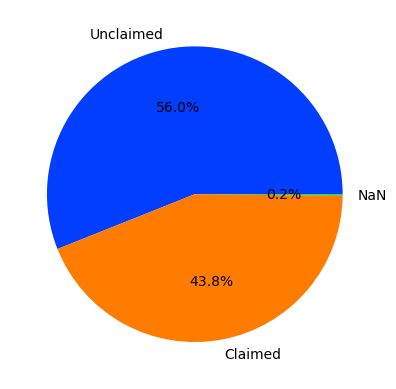

In [17]:
print("Null value count : ", df["claimed"].isna().sum())
print(df[["claimed"]].value_counts())

# pie chart for claimed frequencies
values = np.append(df[["claimed"]].value_counts().values, df["claimed"].isna().sum())
labels = ["Unclaimed", "Claimed", "NaN"]
draw_pie(labels, values)

# code for drop and transform modification for claimed feature
df_claim_drop = df[df["claimed"].notna()].copy()
df_claim_drop["claimed"] = df_claim_drop["claimed"].apply(lambda x : 1 if x == "Claimed" else 0)

#### 3 ) Awards
* Awards feature **820264** missing values which is **%75** of dataset's instance size. This is probably due to most of the restaurants did not win any awards. Instead of removing all these instances a place-holder **"No Reward"** value can be put in place  until further transformation work is implemented that can distinguish between numeric weighting of different types of awards such as Michelin Stars, Certificate of Excellence and No Reward

In [18]:
print("Awards column has " , df["awards"].isna().sum(), " Missing Values \n")
df_award_fill = df.copy()
# code for fill modification
df_award_fill["awards"] = df_award_fill["awards"].fillna("No Reward" )

Awards column has  820264  Missing Values 



#### 4 ) Popularity Detailed / Popularity Generic
* Analysis of Popularity Detailed / Popularity Generic columns shows that most of the instance information for these columns hold little to no information such as **#1 of 1 Restaurant in Rivarennes** or **#1 of 1 Restaurant in Budesti**. Initial idea for generating this information was probably based on ordering/ranking of the restaurants in a specific region. However at this current state it is suggested to **drop columns** from the analysis instead of dropping instances that have missing values for these features. 

In [19]:
print("popularity_detailed column has " , df["popularity_detailed"].isna().sum(), " Missing Values \n")
print("popularity_generic column has " , df["popularity_generic"].isna().sum(), " Missing Values \n")
# code for drop modification
df_popularity_drop = df.copy()
df_popularity_drop = df_popularity_drop.drop(columns= ["popularity_detailed", "popularity_generic"])

popularity_detailed column has  94988  Missing Values 

popularity_generic column has  97792  Missing Values 



#### 5 ) Top Tags
* Feature explains main characteristics of given resturant instance. Since tags consist of several different attributes that may not be imputed correctly , the feature's missing values can be removed row-wise in order to preserve feature information in the dataset.

In [20]:
print("top_tags column has " , df["top_tags"].isna().sum(), " Missing Values \n")
# code for drop modification
df_tag_dropped = df.dropna(axis=0, subset="top_tags")

top_tags column has  110634  Missing Values 



#### 6 ) Price Level & Price Range
* Price Level and Price Range features are informative features for every restaurant however in given dataset both of the features lack the proper information in-place. Parsing/transforming the string data into numeric values and filling missing values with mean/median fill results would be miss-leading given large percentage of null values. 
* Possible approaches can be:

1) Dropping the columns

2) Further analysis with regional data to find median restaurant prices for imputation

3) Specific data gathering/parsing session for price range/level indicators.

In [21]:
print("price_level column has " , df["price_level"].isna().sum(), " Missing Values \n")
print("price_range column has " , df["price_range"].isna().sum(), " Missing Values \n")
print(df["price_level"].unique())
print(df["price_range"].unique(), len(df["price_range"].unique()))

price_level column has  277205  Missing Values 

price_range column has  779070  Missing Values 

['€' '€€-€€€' nan '€€€€']
[nan '€14-€29' '€8-€17' ... '€2-€142' '€18-€81' '€35-€180'] 7299


#### 7 ) Meals, Special_diets, Features, Original_open_hours, Couisine
* Apart from cousine, all the mentioned features can possibly be important features, however their informativeness is significantly reduced for the given dataset due to having %30-40 missing value percentages as shown in the side by side pie charts. 
* Special attention will be given to couisine features since it holds an action in Data understanding part.

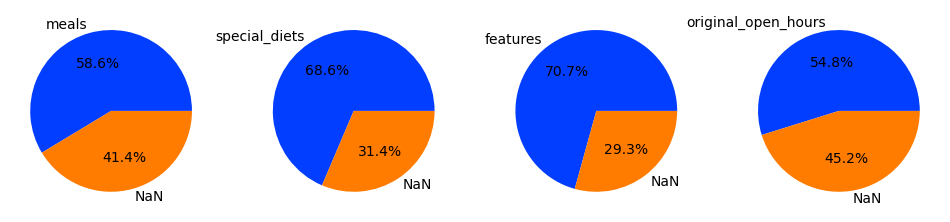

In [22]:
labels = [ "meals", "special_diets", "features", "original_open_hours" ]
palette_color = sns.color_palette('bright')
fig, axs = plt.subplots(1, 4, figsize=(12, 8))
for index, label in enumerate(labels):
    values = list(df[[label]].notna().value_counts())
    label_names = [label, "NaN"]
    axs[index].pie(values,labels = label_names, colors = palette_color, autopct = '%1.1f%%')

plt.show()

## Part 2: Data Understanding
### 2.1. Are the review columns correlated with the rating columns?
* **Review columns:** ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"]
* **Rating columns:** ["food", "service", "value", "atmosphere", "avg_rating"]

**Expectation:** 
* Before the correlation analysis, it is expected that positive scores such as excellent and very good have a high correlation with rating columns and negative scores have low correlation vice versa.

**Analysis and Outcomes:**
* Correlation values are derived for review and rating column as it can be observed in top right corner in the correlation matrix
* None of the rating columns have strong correlation with review columns. We can only conclude that excellent feature is somewhat positively correlated with the rating columns. However, it is observed that there is a steady increase in positivity of correlation values from terrible to excellent in all rating categories which may support the initial expectation.
* For total_reviews_count, reviews_count_in_default_language, it was expected that terrible and excellent resturant have high correlation since customer may have a tendency towards sharing their very good/bad experiences. However, results indicated they have close 0 correlation.


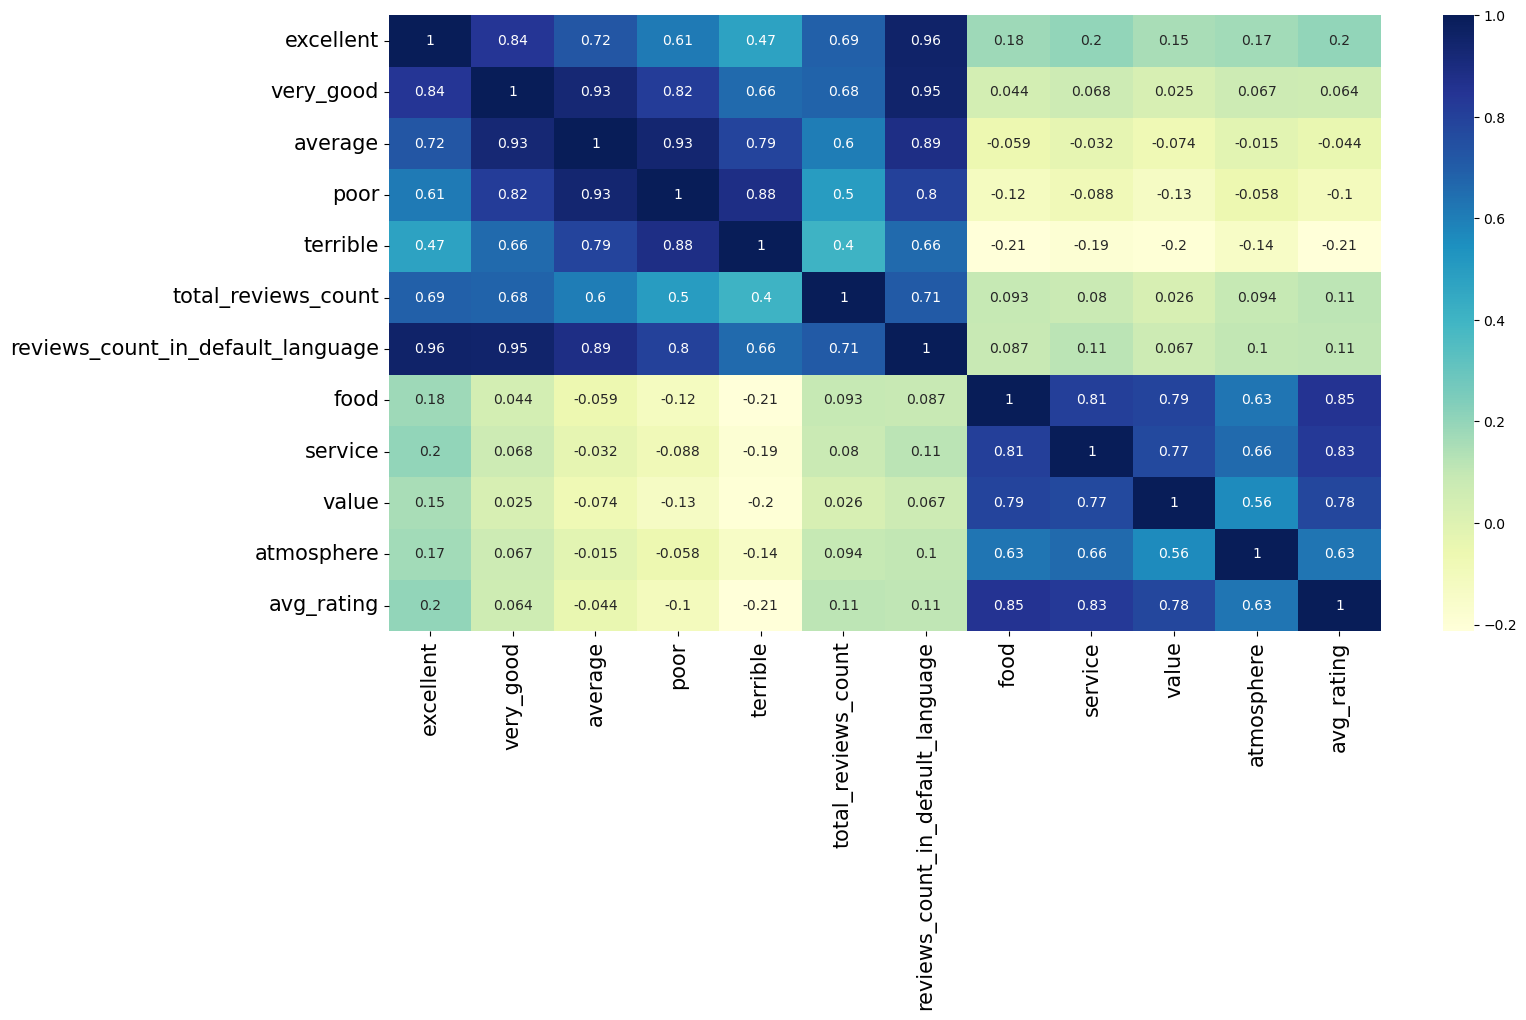

In [23]:
# Correlation Analysis
Review_columns = ["excellent", "very_good", "average", "poor", 
                 "terrible", "total_reviews_count", "reviews_count_in_default_language"]
Rating_columns = ["food", "service", "value", "atmosphere", "avg_rating"]
df_corr = df[Review_columns + Rating_columns].dropna(axis=0)
# heat map correlation matrix plot
plt.figure(figsize = (16,8))
sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### 2.2. Are vegetarian-friendly restaurants better than non-vegetarian ones?
* For the two population hypothesis test with avg_rating feature as their differentiating feature.
> Step 1: Descriptive Analysis
* 1) Histogram and boxplot indicates that vegetarian-friendly resturants have their central tendecy towards better avg_rating scores.
* 2) Non-vegetarian-friendly restaurants have higher variance in given avg_rating range interval while vegetarian-friendly values are more centralized.
* 3) Although both types have large number of instances. The Non-vegetarian-friendly restaurant has almost double the instance size and better represented in the dataset.
> Step 2: Welch’s t-test Hypothesis Test for a Difference in Two Population Means (since we have un-even variances)
* H0, is a statement of “no effect” or “no difference”. For given action, this hypothesis correlates vegetarian-friendly restaurants is same as non-vegetarian ones.
* H0: μ1 – μ2 = 0, which is the same as H0: μ1 = μ2
* The alternative hypothesis, Ha, Ha: μ1 – μ2 > 0, which is the same as Ha: μ1 > μ2
* Hypotheses is tested at the 5% level of significance
* **Approach 1:** Python hands-on t-test statistic calculation
* **Approach 2:** scipy,statsmodel library calculation


#### Step 1: Descriptive Analysis

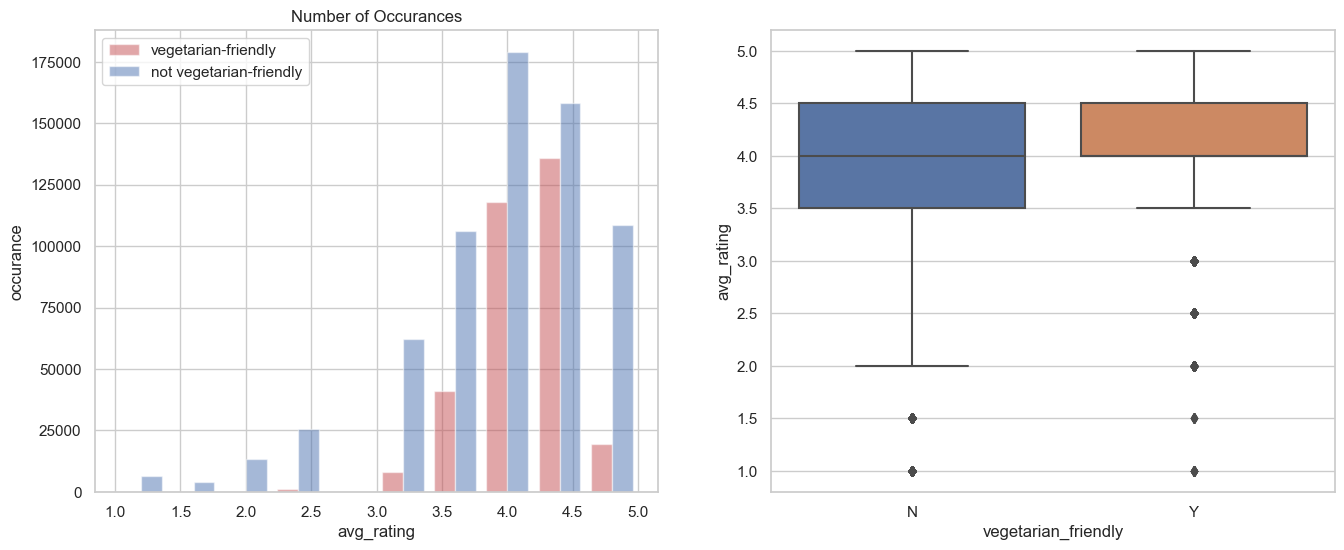

In [24]:
# slicing
df_test = df[["vegetarian_friendly", "avg_rating"]]
df_test = df_test.dropna(axis = 0)
df_test_veg_friendly = df_test["avg_rating"][df_test["vegetarian_friendly"] == "Y"].values 
df_test_not_veg_friendly = df_test["avg_rating"][df_test["vegetarian_friendly"] == "N"].values

# plotting
plt.figure(figsize = (16,6))
sns.set(style='whitegrid')
plt.subplot(1,2,1)
plt.title("Number of Occurances")
plt.xlabel("avg_rating")
plt.ylabel("occurance")
plt.hist([df_test_veg_friendly, df_test_not_veg_friendly]  , color=['r','b'], alpha=0.5)
plt.legend(["vegetarian-friendly", "not vegetarian-friendly"], loc="upper left")
plt.subplot(1,2,2)
sns.boxplot(x='vegetarian_friendly', y='avg_rating', data=df_test)
plt.show()

#### Step 2: Python hands-on and several library application of Welch's t-test statistic calculation
* The hypotheses for this test are H0: μ1 – μ2 = 0 and Ha: μ1 – μ2 > 0. Since the P-value is less than the significance level (0.0 < 0.05), we reject H0 and accept Ha.
* That is there is strong statistical evidence towards vegetarian-friendly restaurants are better than non-vegetarian ones at significance level 0.05

$$
T = \frac{(\bar{_{x1}} - \bar{_{x2}}) - (\bar{_{\mu1}} - \bar{_{\mu2}}))}{\sqrt{(\frac{{s{1}^2}}{n{1}^2})+(\frac{s{2}^2}{n{2}^2}))}}
$$

Vegetarian friendly Restaurant : Count = 323328 --- Average = 4.176085894200317 --- Variance 0.19968751157507633
Not-Vegetarian friendly Restaurant : Count = 663433 --- Average = 3.9676433038453016 --- Variance 0.6460421247993317

 t-test statistic  165.23367528182433

 p_value =   0.0


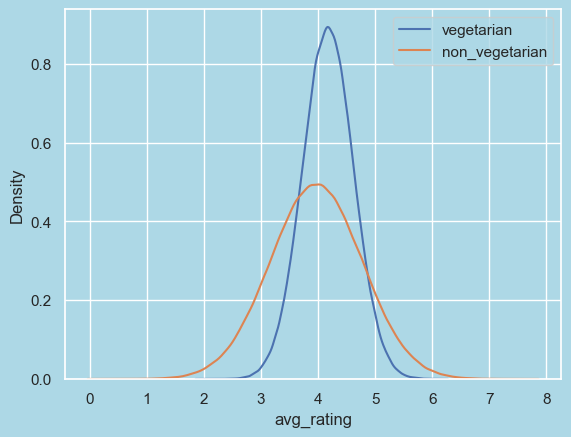


Scipy stats library  Ttest_indResult(statistic=165.23349991620668, pvalue=0.0)

Statsmodel library (165.23349991620802, 0.0, 970671.9062745518)


In [42]:
import scipy.stats
from statsmodels.stats.weightstats import ttest_ind

# hands-on calculation
df_test_veg_friendly = np.array(df_test_veg_friendly)
df_test_not_veg_friendly = np.array(df_test_not_veg_friendly)
print("Vegetarian friendly Restaurant : Count = {} --- Average = {} --- Variance {}".format(len(df_test_veg_friendly), df_test_veg_friendly.mean(), df_test_veg_friendly.var()))
print("Not-Vegetarian friendly Restaurant : Count = {} --- Average = {} --- Variance {}".format(len(df_test_not_veg_friendly), df_test_not_veg_friendly.mean(), df_test_not_veg_friendly.var()))

T_stat = (df_test_veg_friendly.mean() - df_test_not_veg_friendly.mean()) / (np.sqrt(( df_test_veg_friendly.var() / len(df_test_veg_friendly)) + (  df_test_not_veg_friendly.var() / len(df_test_not_veg_friendly))))
print("\n t-test statistic ", T_stat)
degree_of_freedom = len(df_test_veg_friendly) + len(df_test_not_veg_friendly) - 2
p_value = scipy.stats.t.sf(T_stat, df= degree_of_freedom)
print("\n p_value =  ",p_value)

# gaussian normal is used only for visualization purposes
vegetarian = np.random.normal(df_test_veg_friendly.mean(), np.sqrt(df_test_veg_friendly.var()), len(df_test_veg_friendly))
non_vegetarian = np.random.normal(df_test_not_veg_friendly.mean(), np.sqrt(df_test_not_veg_friendly.var()), len(df_test_not_veg_friendly))
sns.kdeplot(vegetarian)
sns.kdeplot(non_vegetarian)
plt.legend(["vegetarian", "non_vegetarian"])
plt.xlabel("avg_rating")
plt.show()

# scipy.stats
print("\nScipy stats library ",scipy.stats.ttest_ind(a=df_test_veg_friendly, b=df_test_not_veg_friendly, equal_var=False, alternative = "greater"))

# statsmodel
print("\nStatsmodel library",ttest_ind(df_test_veg_friendly, df_test_not_veg_friendly, 'larger', "unequal"))

### 2.3. Are there any significantly more expensive cuisines?
* **Mainly Cuisine & price_range** features will be utilized for this specific analysis
* Cuisine information in the dataset given as a string which will be parsed with **","** delimiter to find unique cuisines
* Price_range information is provided in the **"€14-€29"** string format. Min, Max, Ave_price features will be extracted via parsing of the price range feature.

>Following work will be conducted to answer action question
* Mapping of the price-cuisine values
* Assessment of Outliers and Re-arrangement price database
* Plot Analysis of Re-arranged price database - Conclusion

In [43]:
df_cuisine_price = df[["cuisines", "price_range"]].dropna(axis = 0)
df_cuisine_price

,cuisines,price_range
5,French,€14-€29
6,"French, European",€8-€17
7,"French, European",€10-€35
8,"French, Cafe, Deli, Contemporary, Gastropub",€12-€26
9,"French, European, Wine Bar",€12-€30
...,...,...
1083380,"Bar, Romanian, European, Pub, Eastern European...",€1-€11
1083384,"European, Eastern European, Central European, ...",€1-€11
1083385,"Italian, Pizza, Turkish",€2-€12
1083386,"International, Barbecue, European, Romanian, P...",€2-€20


#### Cuisine parsing and min, max, ave price feature extraction

In [44]:
# mapping each cuisine with its price information

dict_cuisine_price = {}
outlier_cousine_instance_list = []
ceil_price = 1000000

for row in range(df_cuisine_price.shape[0]):
    # split string cuisine feature into different cuisine keys
    cuisine_list = df_cuisine_price["cuisines"].iloc[row].split(',')
    price = df_cuisine_price["price_range"].iloc[row]   
    try:
        min_price = float(price.split("-")[0][1:])
        # big max_price values may be problematic due to "," and "." decimal usages
        if (price.split("-")[1][1:].find(',') > -1):
            max_price = float(price.split("-")[1][1:].replace(',',''))
        else:
            max_price = float(price.split("-")[1][1:])
        # some of the really expensive resturant also saved for to be analyzed or mark as outliers/errors
        if (max_price > ceil_price):
            outlier_cousine_instance_list.append([cuisine_list, price])
        ave_price = (max_price + min_price) / 2
    except:
        continue
    for cuisine in cuisine_list:
        dict_cuisine_price.setdefault(cuisine, {"min_prices": [], "max_prices": [], "ave_prices": []})
        dict_cuisine_price[cuisine]["min_prices"].append(min_price)
        dict_cuisine_price[cuisine]["max_prices"].append(max_price)
        dict_cuisine_price[cuisine]["ave_prices"].append(ave_price)

def average_list(lst):
    return sum(lst) / len(lst)

# overall average feature is utilized for the comparison between elements
cuisine_ave_price_matrix = np.empty((len(dict_cuisine_price.keys()), 4), dtype = object)
for row_index, key in enumerate(dict_cuisine_price.keys()):
    for col_index, column in enumerate(["min_prices", "max_prices", "ave_prices"]):
        cuisine_ave_price_matrix[row_index][col_index] = average_list(dict_cuisine_price[key][column])
        cuisine_ave_price_matrix[row_index][3] = key
        
df_cuisine_ave_price = pd.DataFrame(data= cuisine_ave_price_matrix[:, 0:3].astype(float), index= cuisine_ave_price_matrix[:,3], columns= ["min_price", "max_price", "ave_price"])   


In [45]:
print("Cuisine intances with more than 1.000.000 € ceil price range")
for instance in outlier_cousine_instance_list:
    print("Cuisine types = {} Price information = {} ".format(instance[0], instance[1]))
    
df_cuisine_ave_price.sort_values("ave_price",ascending=False).iloc[0:15]

Cuisine intances with more than 1.000.000 € ceil price range
Cuisine types = ['Japanese', ' Asian', ' Sushi'] Price information = €2-€9,999,999 
Cuisine types = ['Brew Pub', ' Bar', ' Dining bars'] Price information = €4-€10,000,000 
Cuisine types = ['Seafood'] Price information = €200-€2,000,000 
Cuisine types = ['Italian', ' Pizza'] Price information = €4-€5,000,000 
Cuisine types = ['Mediterranean'] Price information = €2-€82,794,888 
Cuisine types = ['Seafood', ' Mediterranean', ' European', ' Spanish'] Price information = €30-€100,000,000 
Cuisine types = ['Spanish'] Price information = €6-€9,999,999 
Cuisine types = ['Indian', ' Asian'] Price information = €10-€100,000,000 
Cuisine types = ['Italian'] Price information = €7-€142,504,064 
Cuisine types = ['Cafe', ' Italian'] Price information = €3-€9,999,999 
Cuisine types = ['Italian', ' Mediterranean', ' Tuscan'] Price information = €60-€100,000,000 
Cuisine types = ['Chinese', ' Japanese', ' Sushi', ' Asian', ' Japanese Fusion'

,min_price,max_price,ave_price
Xinjiang,5.625000,69544.000000,34774.812500
Tuscan,15.792507,36062.483429,18039.137968
Indian,11.275422,15803.972253,7907.623837
Japanese Fusion,12.200271,13574.382950,6793.291610
Seafood,13.273987,13378.857255,6696.065621
Ligurian,17.001050,10549.396008,5283.198529
Asian,11.067070,8199.335351,4105.201211
Brew Pub,5.635650,6063.993958,3034.814804
Mediterranean,11.775963,5156.501142,2584.138552
Spanish,11.048249,4814.626570,2412.837410


#### The sorted visualization represents the top 15 cuisines out of 303 types

Total number of different cuisines  303


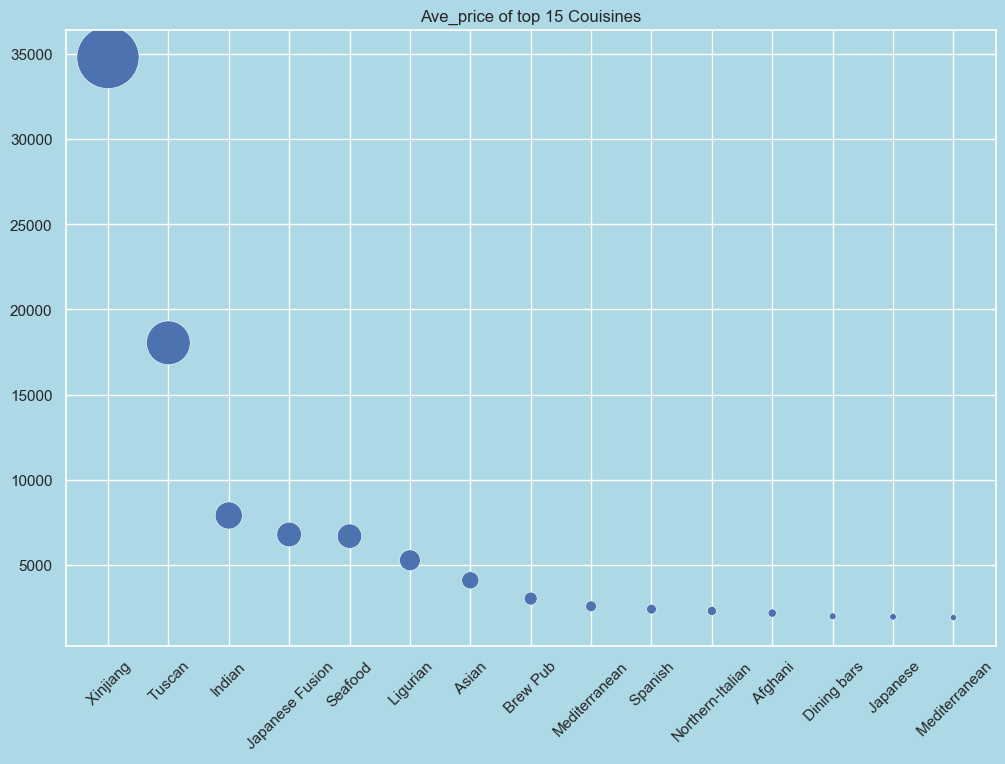

In [47]:
print("Total number of different cuisines ", len(df_cuisine_ave_price))
plt.figure(figsize = (12,8))
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.scatterplot(x=np.arange(1,16),
                y=df_cuisine_ave_price.sort_values("ave_price",ascending=False).iloc[0:15]["ave_price"].values,
                size=df_cuisine_ave_price.sort_values("ave_price",ascending=False).iloc[0:15]["ave_price"].values,
                legend=False, sizes=(20, 2000))
plt.xticks(np.arange(1,16), df_cuisine_ave_price.sort_values("ave_price",ascending=False).iloc[0:15].index, rotation = 45)
plt.title("Ave_price of top 15 Couisines")
plt.show()

## Part 3: Business-specific
### 3.1. For taken smaller dataset into account, what would be the top 5 capitals to open gluten-free restaurant?
* For this part action, it is stated that there are no other factors, except population and gluten-free restaurant density,
> Analysis approach will be as follows:
* (1) Filter European Capitals from new dataset.
* (2) Filter original dataset based on (1) and take the groupby count of the cities.
* (3) If there is not one to one match 0 value will be given to city indexes.
* (4) Create Gluten-Free Restaurant Count & Restaurant_count_per_pop features to determine restaurant density
> Please see Plotting Section for action answer

In [49]:
# Please change path accordingly
path = "europe_capitals_population_and_area.csv"
df_capital_pop_area = pd.read_csv(path, delimiter=";", index_col=1)

In [50]:
df_capital_pop_area.head()

,CityNo,Country,Population,Area in km2
City,,,,
Amsterdam,1,Netherland,851573,"219,32"
Athens,2,Greece,664046,2929
Barcelona,4,Spain,1620809,"101,4"
Berlin,4,Germany,3711930,"891,7"
Bratislava,5,Slovakia,424428,"367,6"


In [51]:
print(df_capital_pop_area.index)
df_capital_pop_area.info()

Index(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Bratislava', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
       'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
       'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich'],
      dtype='object', name='City')
<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Amsterdam to Zurich
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CityNo        31 non-null     int64 
 1   Country       31 non-null     object
 2   Population    31 non-null     int64 
 3   Area in km2   31 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [52]:
# From the original dataset
df_gluten_free = df[["city", "gluten_free"]][df["gluten_free"] == "Y"].groupby("city").count().sort_values("gluten_free", ascending=False)
print(df_gluten_free.index)
df[["city", "gluten_free"]][df["gluten_free"] == "Y"].groupby("city").count().sort_values("gluten_free", ascending=False).iloc[0:10]


Index(['Rome', 'Madrid', 'Milan', 'Amsterdam', 'Dublin', 'Paris', 'Lisbon',
       'Budapest', 'Vienna', 'Birmingham',
       ...
       'Kelheim', 'Kelham', 'Kelbrook', 'Keitum', 'Kehl', 'Kefalovrisi',
       'Kefali', 'Keelby', 'Kearsley', 'Zwonitz'],
      dtype='object', name='city', length=11577)


,gluten_free
city,
Rome,1654
Madrid,1368
Milan,1154
Amsterdam,622
Dublin,596
Paris,582
Lisbon,537
Budapest,433
Vienna,413


> Barplot and modified dataframe suggest that there are major cities such as Berlin and London with 0 Restaurant_count_per_pop. However, this is due to original dataset not having instances of these cities.
> Therefore, 5 capitals to open that restaurant is the lowest restaurant capitals that have actually represented in dataset.
* Budapest
* Vienna
* Munich
* Bratislava
* Lyon

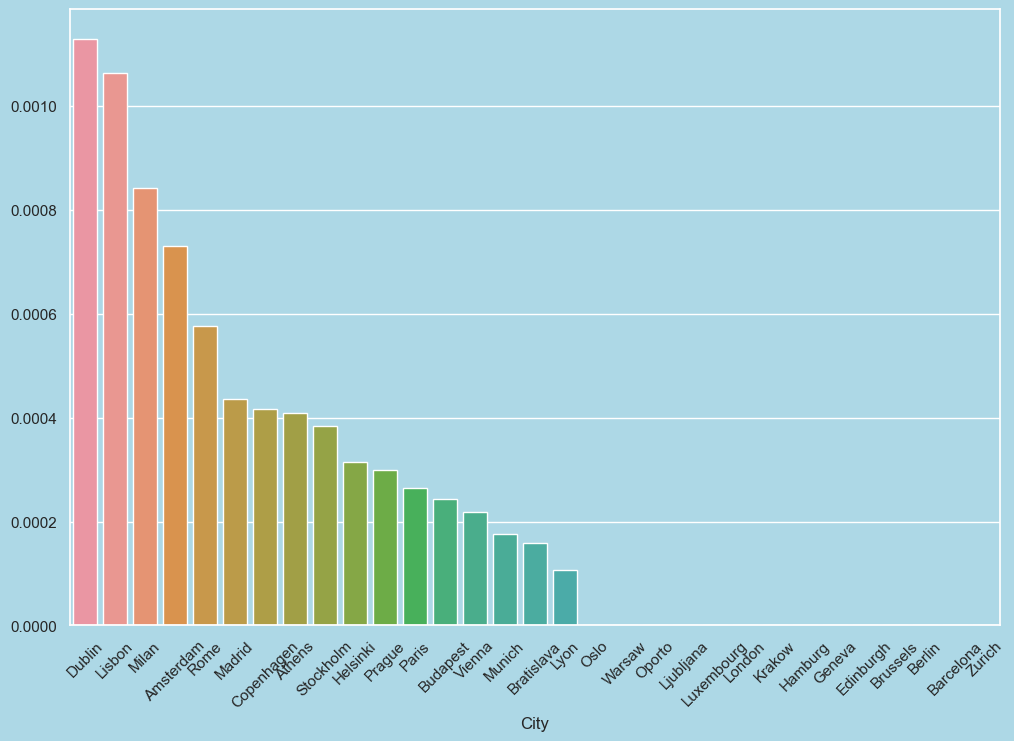

,CityNo,Country,Population,Area in km2,Gluten-Free Restaurant Count,Restaurant_count_per_pop
City,,,,,,
Dublin,9,Ireland,527612,115,596,0.001130
Lisbon,15,Portugal,504718,100,537,0.001064
Milan,21,Italy,1370074,"181,76",1154,0.000842
Amsterdam,1,Netherland,851573,"219,32",622,0.000730
Rome,27,Italy,2868782,1285,1654,0.000577
Madrid,20,Spain,3141991,"604,3",1368,0.000435
Copenhagen,8,Denmark,602481,"88,25",251,0.000417
Athens,2,Greece,664046,2929,271,0.000408
Stockholm,28,Sweden,952058,188,366,0.000384


In [53]:
gluten_free_resturant_count = np.zeros(shape = (31,) , dtype = int)
for index, city in enumerate(df_capital_pop_area.index):
    try:
        gluten_free_resturant_count[index] = df_gluten_free.loc[city, "gluten_free"]
    except:
        continue

df_capital_pop_area_count = df_capital_pop_area.copy()
df_capital_pop_area_count["Gluten-Free Restaurant Count"] = gluten_free_resturant_count
df_capital_pop_area_count["Restaurant_count_per_pop"] = df_capital_pop_area_count["Gluten-Free Restaurant Count"].values / df_capital_pop_area_count["Population"].values
df_capital_pop_area_count = df_capital_pop_area_count.sort_values("Restaurant_count_per_pop", ascending=False)
plt.figure(figsize = (12,8))
sns.barplot(data = df_capital_pop_area_count, x = df_capital_pop_area_count.index,  y = df_capital_pop_area_count["Restaurant_count_per_pop"].values )
plt.xticks(rotation = 45)
plt.show()
df_capital_pop_area_count

### 3.2. Think and propose a couple of other ways this dataset could be used to help businesses.
Proposals data analytics and business ideas based on given dataset are as follows:
*  Most and Least reachable cuisine analysis for each of the capitals and cities. This may be a basis for targeted restaurant opening or personalized recommendation for cuisine enthusiast and can also be a basis for further customer attention as they search.
* Heat map of awards and cities can help travelers and food enthusiast to select their destination. For businesses it provides information about the market competititon in their region and also about quality and competitiveness requirements in their area to enhance restaurant credibility.
* Restaurant activity analysis in terms of open day-hours, workday etc. can help customers to base their dining options on this information while competitors can re-arrange their working hours/days to take advantage of this information. Creating a marketing campaign based on differention can increase brand recognition
* Vegetarian friendly and vegan option features can offer information about the capitals as we did in the section 3.1.
* Rating analysis for specific cuisine or meal type selected cities can offer information about best place open a specific cuisine type where it holds the least amount of competition.
* Feature and special diet features may be an important anaylsis for some of the cities. Cultural differences might require additional features from the business. Special attention to these details and features can improve customer loyalty and trust

## Part 4:Bonus
### 4.1. Determine the best location for an Italian Restaurant in Paris city
* Solution approach:
* (1) Lat/Long information will be extracted from the .json file and will be represented as scatter map
* (2) Necessary filters will be applied to original dataset to locate Italian restaurant in designated Paris polygon
* (3) By using Lat/Long information in original dataset, simple equally divided grid map will be constructed for total number of restaurants. (Please note uniform population distribution enabled us to just look at the region size as is instead of density)
* (4) Inspection of the grids (please see heat map) can allow us to make an informed decision.

> Answer: longitude 2.23 : & latitude: 4.85 & 4.87 grids is good candidates. Also notice the triangle shape correlation between heap map and scatter points

In [80]:
# import and derivation of lat-long information
df_paris_polygon = pd.read_json('paris_bounding_polygon.json')
df_paris_polygon = df_paris_polygon.rename(columns={0: 'longitude', 1: 'latitude'})
lat_max = df_paris_polygon['latitude'].max()
lat_min = df_paris_polygon['latitude'].min()
long_max = df_paris_polygon['longitude'].max()
long_min = df_paris_polygon['longitude'].min()
print("longitude max/min", long_max , " - ", long_min)
print("latitude max/min", lat_max, " - ", lat_min)
df_paris_polygon

longitude max/min 2.4697602  -  2.2241219
latitude max/min 48.902156  -  48.8155755


,longitude,latitude
0,2.224169,48.853442
1,2.224161,48.853478
2,2.224143,48.853578
3,2.224135,48.853654
4,2.224129,48.853759
...,...,...
914,2.238144,48.850367
915,2.237800,48.850440
916,2.226361,48.852959
917,2.225560,48.853136


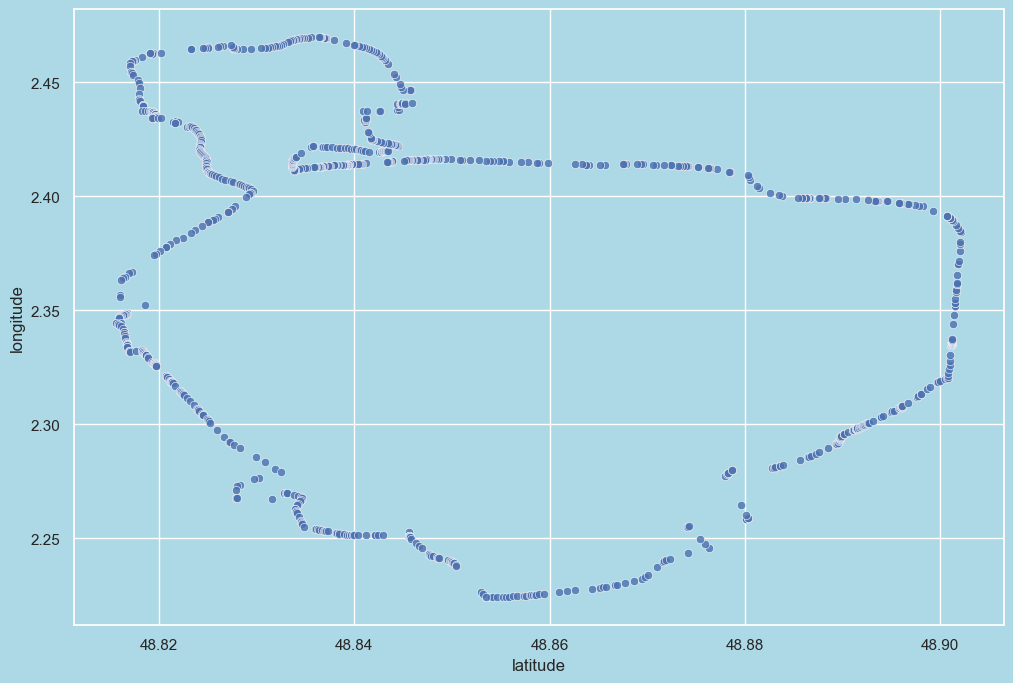

In [55]:
# scatter plot of the given .json file coordinates
plt.figure(figsize = (12,8))
sns.scatterplot(data = df_paris_polygon , x="latitude", y="longitude", alpha=0.8)
plt.show()

In [56]:
# derivation of required ['country','cuisines', 'longitude', 'latitude'] for Italian Restaurant search
df_france_resturants = df[df["country"] == "France"].dropna(axis = 0, subset= ['cuisines', 'longitude', 'latitude']).copy()
df_france_resturants = df_france_resturants[['country','cuisines', 'longitude', 'latitude']]
df_france_resturants

,country,cuisines,longitude,latitude
0,France,French,1.169131,45.961674
2,France,"French, European",1.386133,46.635895
3,France,French,1.824460,45.642610
4,France,French,2.960470,44.208860
5,France,French,3.855819,46.169823
...,...,...,...,...
155283,France,"French, American, Fast food",2.573007,46.337906
155284,France,French,0.459540,49.749690
155285,France,French,7.539170,48.631910
155286,France,European,2.447226,48.958115


In [57]:
# Italian Restaurant in France lat-long inforation
france_italian_lat_long = {'longitude': [], 'latitude': []}

for row in range(df_france_resturants.shape[0]):
    if (df_france_resturants.iloc[row]["cuisines"].find('Italian') > -1):
        france_italian_lat_long['longitude'].append(df_france_resturants.iloc[row]["longitude"])
        france_italian_lat_long['latitude'].append(df_france_resturants.iloc[row]["latitude"])
france_italian_lat_long = pd.DataFrame(france_italian_lat_long)
france_italian_lat_long

,longitude,latitude
0,6.076796,43.315495
1,6.091490,43.304080
2,6.875290,45.285300
3,6.877013,45.285210
4,6.878860,45.285270
...,...,...
16144,3.020340,50.615590
16145,3.039327,50.602234
16146,1.823009,43.729256
16147,4.693460,43.861710


In [58]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning) # to turn off index arrangement warning
# dataset is further sliced to analyze given .json file coordinates.
france_italian_lat_long_filtered_ = france_italian_lat_long.copy()
france_italian_lat_long_filtered_ = france_italian_lat_long_filtered_[(long_min <= france_italian_lat_long['longitude']) & (long_max >= france_italian_lat_long['longitude'])]
france_italian_lat_long_filtered_ = france_italian_lat_long_filtered_[(lat_min <= france_italian_lat_long['latitude']) & (lat_max >= france_italian_lat_long['latitude'])]
france_italian_lat_long_filtered_

,longitude,latitude
299,2.439521,48.855570
300,2.420620,48.853940
301,2.438908,48.860058
302,2.434230,48.857650
303,2.439900,48.859320
...,...,...
16097,2.303500,48.822440
16098,2.301160,48.819140
16099,2.300920,48.818520
16100,2.299920,48.820920


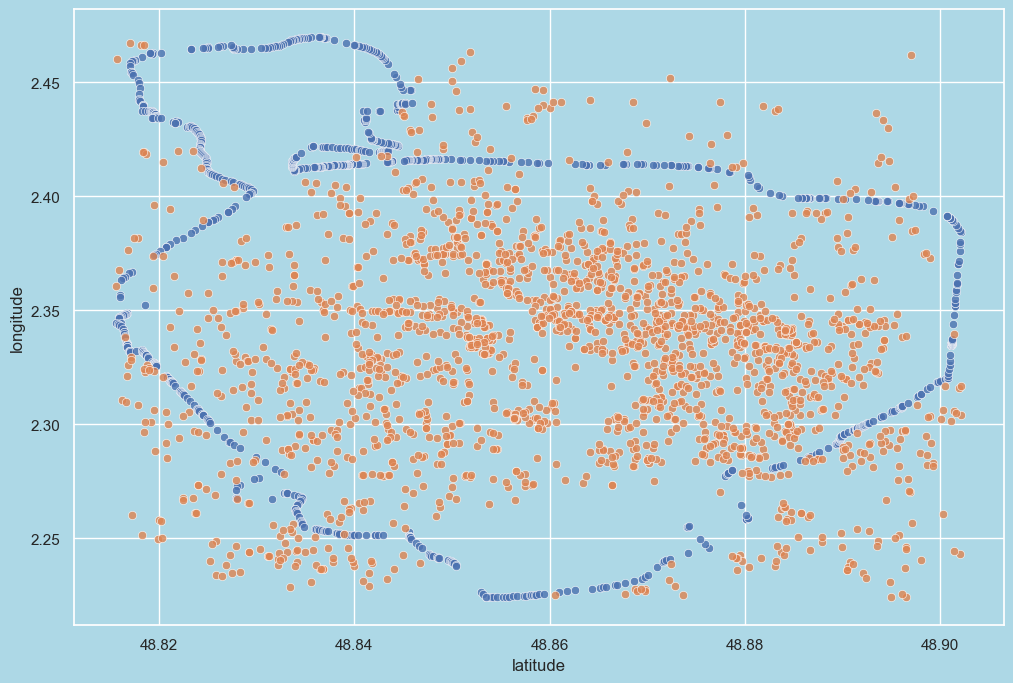

In [59]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df_paris_polygon , x="latitude", y="longitude", alpha=0.8)
sns.scatterplot(data = france_italian_lat_long_filtered_ , x="latitude", y="longitude", alpha=0.8)
plt.show()

[48.8  48.82 48.83 48.85 48.87 48.88 48.9 ]
[2.2  2.23 2.27 2.3  2.33 2.37 2.4 ]
[[  0   3   2  16   4   5]
 [  0  24  17  26  23  12]
 [  2  67  75 110 114  68]
 [  7   3  70  83 328 136]
 [  2   8  54  94 158  21]
 [  3  47  88 105 134  33]]


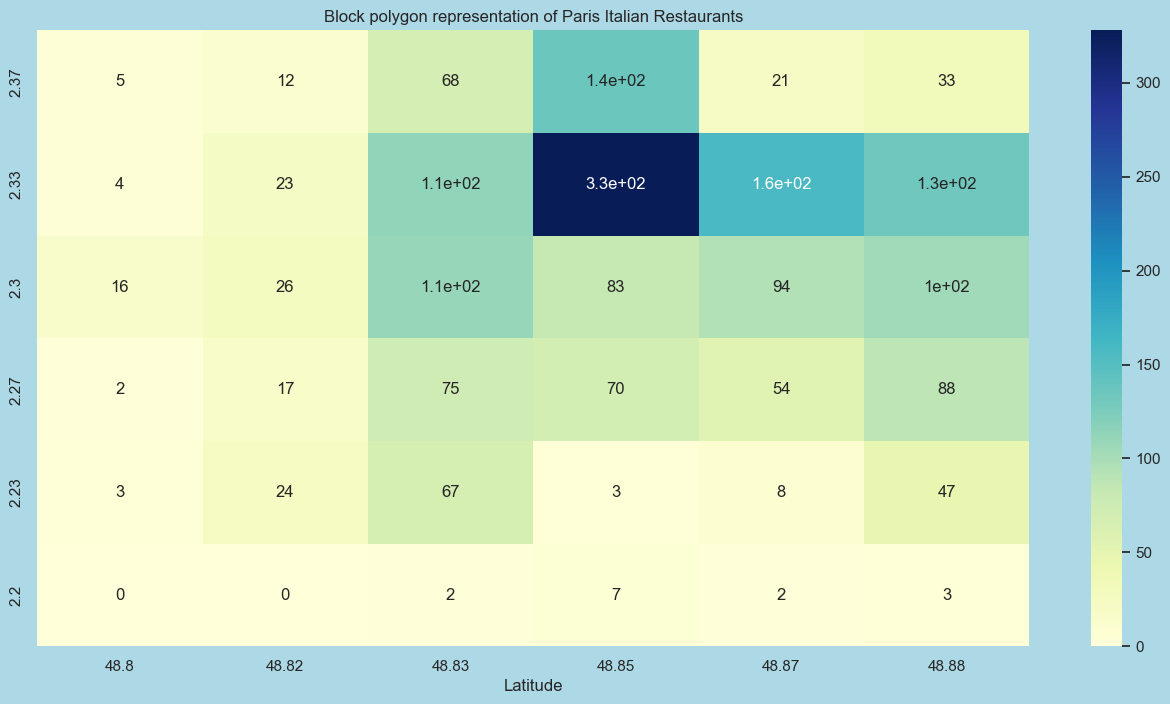

In [79]:
long_boundaries = np.round(np.linspace(2.20, 2.40, 7),2)
lat_boundaries = np.round(np.linspace(48.80, 48.90, 7),2)
print(lat_boundaries)
print(long_boundaries)

# arrangement of heat map count data.
density_matrix = np.zeros(shape = (6,6), dtype = int)
for index_long in range(len(long_boundaries) - 1):
    for index_lat in range(len(lat_boundaries) - 1):
        temp = france_italian_lat_long_filtered_[france_italian_lat_long_filtered_.longitude >= long_boundaries[index_long]]
        temp = temp[temp.longitude < long_boundaries[index_long + 1]]
        temp = temp[temp.latitude >= lat_boundaries[index_lat]]
        temp = temp[temp.latitude < lat_boundaries[index_lat + 1]]
        density_matrix[index_lat][index_long] = temp.shape[0]
plt.figure(figsize = (16,8))
plt.title("Block polygon representation of Paris Italian Restaurants")
sns.heatmap(np.rot90(density_matrix), cmap="YlGnBu", annot=True, xticklabels= lat_boundaries[:-1:],
                                                                yticklabels=np.flip(long_boundaries[:-1:]))
plt.xlabel("Latitude")
print(density_matrix)
plt.show()


### Summary of Outcomes
#### Part 1: Data cleaning
* Several pandas transform methods are applied to handle mixed data types issue
* Detailed analysis  is conducted for each feature and proper imputation, drop and fill ideas were presented with their rationalizations

#### Part 2: Data understanding
* Correlation analysis is implemented for review and rating columns of the dataset. Observations are provided for trends in the correlation.
* Hypothesis Test was applied to determine vegetarian-friendly restaurants being better than their counter-parts.
* For Expensive cuisine analysis, dataset modifications are implemented. Possible candidates for price outliers were detected and listed. Visualization of re-arranged cuisine-price database was implemented.

#### Part 3: Business-specific
* Gluten free restaurant density analysis is implemented via using the smaller dataset and creating new features. Outcomes are provided based on resulting plots and final dataset.
* Proposals for data analytics and business ideas based on given dataset are presented.

#### Part 4: Bonus
*  Geospatial data is visualized and restaurant opening suggestion was made based on frequency of restaurant in Paris region.